In [1]:
import os 
import sys

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(os.path.join(os.path.abspath(''), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

import numpy as np
from desilike.samples import Profiles, Chain, plotting
sys.path.append('../bin')
from emulator_fit import get_power_likelihood

tracer = 'ELG'
region = ''
stat = 'power'
rp_cut = 2.5
ktmax = 0.5
krange = (0.02, 0.2, 0.005)

In [2]:
data_dir = '/global/cfs/cdirs/desi/users/mpinon/cubicSecondGenMocks/pk'
power_cubic_list = []

from power_spectrum import naming
from pypower import CatalogFFTPower
ells = (0, 2, 4)

for imock in range(0, 25):
    for los in 'xyz':
        data_fn = naming(filetype='power', data_type='cubicsecondgenmocks', imock=imock, tracer=tracer[:3], completeness='', region=region, rpcut=0, direct_edges=False, los=los, highres=True)
        power_cubic = CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles(ell=ells, complex=False)
        power_cubic_list.append(power_cubic)
k_cubic = CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles.k
mean_cubic = np.mean(power_cubic_list, axis=0)
std_cubic = np.std(power_cubic_list, axis=0)

In [3]:
naming(filetype='power', data_type='cubicsecondgenmocks', imock=imock, tracer=tracer[:3], completeness='', region=region, rpcut=0, direct_edges=False, los=los, highres=True)

'power_mock24_ELG_losz_highres.npy'

### theory fitted on cubic mocks

In [4]:
#data_dir = '/global/cfs/cdirs/desi/users/mpinon/emulators/'
#data_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/'
data_dir = '/global/cfs/cdirs/desi/users/mpinon/cubicSecondGenMocks/'

data_type = 'cubicsecondgenmocks'
template_name = 'shapefitqisoqap'

emulator_dir = os.path.join(data_dir, 'emulators/test/emulators_{}_{}'.format(template_name, tracer))
profiles_dir = os.path.join(data_dir, 'profiles', data_type, 'profiles_{}_{}_{{}}{}'.format(template_name, tracer, region))

In [5]:
profile_cubic = Profiles.load(os.path.join(profiles_dir.format('complete_'), '{}_velocileptors.npy'.format(stat)))

In [6]:
#likelihood = get_power_likelihood(data_type=data_type, tracer=tracer, region=region, completeness='complete_', solve=False, fc='', rp_cut=rp_cut, emulator_fn=os.path.join(emulator_dir.format('complete_'), '{}_{{}}.npy'.format(stat)))

#likelihood.solved_default = '.best'
#likelihood(**profile_cubic.bestfit.choice(input=True))
#box_obs = likelihood.observables[0]
#box_theory = box_obs.theory

In [7]:
print(profile_cubic.to_stats(tablefmt='pretty'))

+-----------------------------------------+--------+---------+-------+
| chi2 / (198 - 13) = 107.34 / 185 = 0.58 | varied | bestfit | error |
+-----------------------------------------+--------+---------+-------+
|                  qiso                   |  True  |  1.001  | 0.011 |
|                   qap                   |  True  |  0.997  | 0.018 |
|                   dm                    |  True  |  0.007  | 0.043 |
|                   df                    |  True  |  1.009  | 0.044 |
|                   b1                    |  True  |  0.303  | 0.048 |
|                   b2                    |  True  |  -0.5   |  1.6  |
|                   bs                    |  True  |  -0.4   |  1.5  |
|                 alpha0                  |  True  |   1.1   |       |
|                 alpha2                  |  True  |  -4.8   |       |
|                 alpha4                  |  True  |   4.4   |       |
|                   sn0                   |  True  | 0.0012  |       |
|     

### theory fitted on cutsky mocks

In [8]:
tracer = 'ELG_LOP'
region = 'SGC'

data_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/'

data_type = 'Y1secondgenmocks'
template_name = 'shapefitqisoqap'

emulator_dir = os.path.join(data_dir, 'emulators/emulators_{}_{}'.format(template_name, tracer))
profiles_dir = os.path.join(data_dir, 'profiles', data_type, 'profiles_{}_{}_{{}}{}'.format(template_name, tracer, region))
profile_cutsky = Profiles.load(os.path.join(profiles_dir.format('complete_'), '{}_velocileptors{}{}.npy'.format(stat, '_rpcut{:.1f}'.format(rp_cut) if rp_cut else '', '_directedges' if rp_cut else '')))
profile_cutsky_sculptwindow = Profiles.load(os.path.join(profiles_dir.format('complete_'), '{}_velocileptors{}{}_sculptwindow.npy'.format(stat, '_rpcut{:.1f}'.format(rp_cut) if rp_cut else '', '_directedges' if rp_cut else '')))

In [9]:
likelihood = get_power_likelihood(data_type=data_type, tracer=tracer, region=region, completeness='complete_', solve=False, fc='', rp_cut=rp_cut, emulator_fn=os.path.join(emulator_dir.format('complete_'), '{}_{{}}.npy'.format(stat)))

likelihood.solved_default = '.best'
likelihood(**profile_cutsky.bestfit.choice(input=True))
cutsky_obs = likelihood.observables[0]
cutsky_theory = cutsky_obs.theory

footprint


In [10]:
likelihood_sculptwindow = get_power_likelihood(data_type=data_type, tracer=tracer, region=region, completeness='complete_', solve=False, fc='', rp_cut=rp_cut, sculpt_window=True, emulator_fn=os.path.join(emulator_dir.format('complete_'), '{}_{{}}.npy'.format(stat)))

likelihood_sculptwindow.solved_default = '.best'
likelihood_sculptwindow(**profile_cutsky_sculptwindow.bestfit.choice(input=True))
cutsky_obs_sculptwindow = likelihood_sculptwindow.observables[0]
cutsky_theory_sculptwindow = cutsky_obs_sculptwindow.theory

footprint
k cov :  [0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055 0.06  0.065 0.07  0.075
 0.08  0.085 0.09  0.095 0.1   0.105 0.11  0.115 0.12  0.125 0.13  0.135
 0.14  0.145 0.15  0.155 0.16  0.165 0.17  0.175 0.18  0.185 0.19  0.195]


### window

In [73]:
from power_spectrum import naming
from pypower import BaseMatrix

window_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/windows'
wm_fn = naming(filetype='wm', data_type='Y1secondgenmocks', imock=None, tracer=tracer, completeness='complete_', region=region, rpcut=rp_cut, direct_edges=rp_cut)
wm = BaseMatrix.load(os.path.join(window_dir, wm_fn.format('')))
koutrebin = 1
wm.slice_x(sliceout=slice(0, len(wm.xout[0]) // koutrebin * koutrebin, koutrebin))
#wm.select_x(xoutlim=(np.min(cutsky_obs.k[0]), np.max(cutsky_obs.k[0])))
wm.select_x(xoutlim=(krange [0], krange [1]))
kinrebin = 10
wm.slice_x(slicein=slice(0, len(wm.xin[0]) // kinrebin * kinrebin, kinrebin))
wm.select_x(xinlim=(0.005, ktmax))

In [74]:
np.max(wm.xin[0])

0.4949723742632283

In [75]:
np.max(k_cubic)

3.2125008103424837

In [76]:
from scipy.interpolate import interp1d

mean_cubic_interp = interp1d(k_cubic, mean_cubic)(wm.xin[0])
wm_pk_cubicdata = wm.value.T.dot(mean_cubic_interp.flatten()).reshape((len(ells), wm.shape[1]//len(ells)))

In [77]:
naming(filetype='wm', data_type='Y1secondgenmocks', imock=None, tracer='ELG_LOP', completeness='complete_', region='SGC', rpcut=rp_cut, direct_edges=rp_cut)

'wm{}_ELG_LOP_complete_SGC_rpcut2.5_directedges_max5000.npy'

In [78]:
## transformed window
output_dir = os.path.join('/global/cfs/cdirs/desi/users/mpinon/sculpt_window/secondGenMocksY1')
ells = (0, 2, 4)
window_fn = os.path.join(output_dir, 'wmatrix_smooth_{}_complete_gtlimaging_{}_{:.1f}_{:.1f}_default_lin{}_ells{}_analyticcov_ktmax{}_autokwid_capsig5_difflfac10.npy'.format(tracer, region, 0.8, 1.6, '_rpcut{:.1f}_directedges'.format(rp_cut) if rp_cut else '', ''.join([str(i) for i in ells]), ktmax))
wmnew = BaseMatrix.load(window_fn)
mmatrix_fn = os.path.join(output_dir, 'mmatrix_smooth_{}_complete_gtlimaging_{}_{:.1f}_{:.1f}_default_lin{}_ells{}_analyticcov_ktmax{}_autokwid_capsig5_difflfac10.npy'.format(tracer, region, 0.8, 1.6, '_rpcut{:.1f}_directedges'.format(rp_cut) if rp_cut else '', ''.join([str(i) for i in ells]), ktmax))
mmatrix = np.load(mmatrix_fn)
mo_fn = os.path.join(output_dir, 'mo_{}_complete_gtlimaging_{}_{:.1f}_{:.1f}_default_lin{}_ells{}_analyticcov_ktmax{}_autokwid_capsig5_difflfac10.npy'.format(tracer, region, 0.8, 1.6, '_rpcut{:.1f}_directedges'.format(rp_cut) if rp_cut else '', ''.join([str(i) for i in ells]), ktmax))
mo = np.load(mo_fn)
power_fn = os.path.join(output_dir, "pkpoles_{}_complete_gtlimaging_{}_{:.1f}_{:.1f}_default_lin{}_ells{}_analyticcov_ktmax{}_autokwid_capsig5_difflfac10.npy".format(tracer, region, 0.8, 1.6, '_rpcut{:.1f}'.format(rp_cut) if rp_cut else '', ''.join([str(i) for i in ells]), ktmax))
pknew = np.load(power_fn)
cov_fn = os.path.join(output_dir, "cov_{}_complete_{}_{:.1f}_{:.1f}{}_ells{}_analyticcov_ktmax{}_autokwid_capsig5_difflfac10.npy".format(tracer, region, 0.8, 1.6, '_rp{:.1f}'.format(rp_cut) if rp_cut else '', ''.join([str(i) for i in ells]), ktmax))
covnew = np.load(cov_fn)

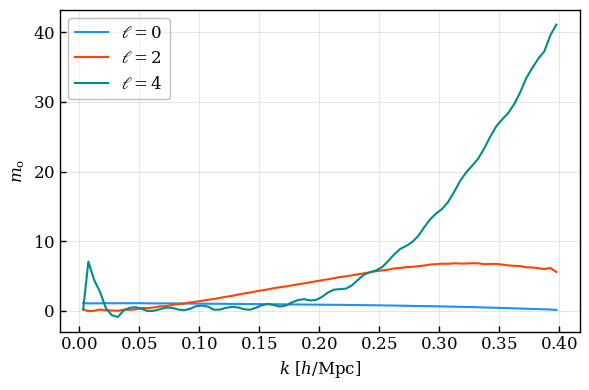

In [79]:
l = len(wmnew.xout[0])

for i, ell in enumerate([0, 2, 4]):
    moell = mo[i][i*l:(i+1)*l]
    plt.plot(wmnew.xout[0], moell, label=r'$\ell = {}$'.format(ell))
plt.xlabel(r'$k$ [$h$/Mpc]')
plt.ylabel(r'$m_{\mathrm{o}}$')
plt.legend()
plt.show()

In [80]:
ktlong = wm.xin[0]
wmnormed = wm.select_proj(projsin=(0, 0), projsout=(0, None)).value#/ktlong[:, None]
#ktlong = np.concatenate((wmnew.xin[0], )*3)
ktlong = wmnew.xin[0]
wmnewnormed = wmnew.select_proj(projsin=(0, 0), projsout=(0, None)).value#/ktlong[:, None]

In [82]:
#maskt = np.concatenate(((wmnew.xin[0] >= 0.05) & (wmnew.xin[0] <= 0.35), )*3)
maskt = (wmnew.xin[0] >= 0.05) & (wmnew.xin[0] <= 0.35)
qnew = wmnewnormed[maskt, :]
maskt = (wm.xin[0] >= 0.05) & (wm.xin[0] <= 0.35)
q = wmnormed[maskt, :]

In [83]:
np.linalg.norm(q, ord=1)

1.0631724695814377

In [84]:
np.linalg.norm(q, ord=1)/np.linalg.norm(wmnormed, ord=1)

0.8501036315740547

In [85]:
np.linalg.norm(qnew, ord=1)

1.0681345678538137

In [86]:
np.linalg.norm(qnew, ord=1)/np.linalg.norm(wmnewnormed, ord=1)

0.9523438536324225

In [17]:
from emulator_fit import aprime
from cov_utils import truncate_cov

covdir = '/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/blinded/pk/covariances/v0.1.5'
c1 = np.loadtxt(os.path.join(covdir, 'cov_gaussian_prerec_ELG_LOPnotqso_GCcomb_0.8_1.1.txt'))
c2 = np.loadtxt(os.path.join(covdir, 'cov_gaussian_prerec_ELG_LOPnotqso_GCcomb_1.1_1.6.txt'))
cov = np.linalg.inv(np.linalg.inv(c1) + np.linalg.inv(c2))

test = aprime(cov, mo)

240
240
[[ 2.86829599e+01  3.35137503e-01 -9.56426770e-03]
 [ 3.35137503e-01  1.43635071e+00 -3.93422507e-02]
 [-9.56426770e-03 -3.93422507e-02  1.58117240e-01]]
3
3


In [18]:
test.shape

(240, 240)

In [19]:
np.linalg.matrix_rank(test)

237

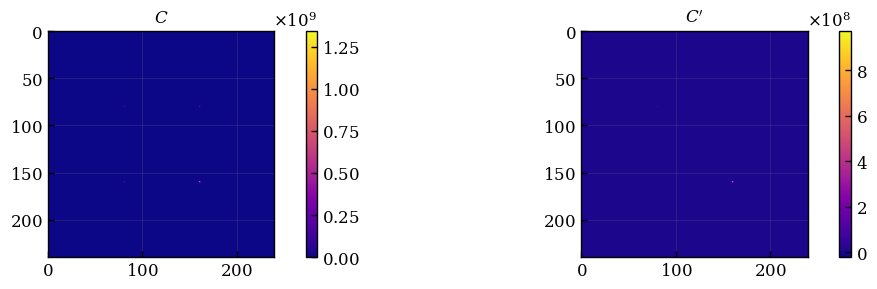

In [20]:
fig, lax = plt.subplots(1, 2, figsize=(12, 3))

cmap = lax[0].imshow(cov)
lax[0].set_title(r'$C$')
fig.colorbar(cmap)
#cmap = lax[1].imshow(test)
#fig.colorbar(cmap)
cmap = lax[1].imshow(covnew)
lax[1].set_title(r'$C^{\prime}$')
fig.colorbar(cmap)

plt.show()

In [22]:
len(np.arange(0, 0.4, 0.005))

80

In [23]:
#wmnew.select_x(xoutlim=(np.min(cutsky_obs.k[0]), np.max(cutsky_obs.k[0])))
wmnew.select_x(xoutlim=(krange [0], krange [1]))
kinrebin = 10
wmnew.slice_x(slicein=slice(0, len(wmnew.xin[0]) // kinrebin * kinrebin, kinrebin))
wmnew.select_x(xinlim=(0.005, np.max(wmnew.xin[0])))

In [24]:
from emulator_fit import get_fit_setup, get_template, get_theory
from desilike.theories.galaxy_clustering import LPTVelocileptorsTracerPowerSpectrumMultipoles

z, b0, klim, slim = get_fit_setup(tracer, theory_name='velocileptors')
for lim in klim.values():
    lim[1] = krange[1]
from cosmoprimo.fiducial import DESI
fiducial = DESI()
b1E = b0 / fiducial.growth_factor(z)

template = get_template(template_name=template_name, z=z)

theory = LPTVelocileptorsTracerPowerSpectrumMultipoles(template=template, ells=klim.keys(), k=wm.xin[0])
pk_theory = theory(**profile_cubic.bestfit.choice(input=True))

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20231013-1.0.0/code/cosmoprimo/main/lib/python3.10/site-packages/cosmoprimo/eisenstein_hu.py:23: UserWarning: EisensteinHuNoWiggleEngine cannot cope with massive neutrinos
  warnings.warn('{} cannot cope with massive neutrinos'.format(self.__class__.__name__))


In [25]:
ells = (0, 2, 4)
wm_pk = (wm.value.T.dot(pk_theory.flatten())).reshape((len(ells), wm.shape[1]//len(ells)))

In [26]:
theory_new = LPTVelocileptorsTracerPowerSpectrumMultipoles(template=template, ells=klim.keys(), k=wmnew.xin[0])
pk_theory_new = theory_new(**profile_cubic.bestfit.choice(input=True))
wmnew_pk = (wmnew.value.T.dot(pk_theory_new.flatten())).reshape((len(ells), wmnew.shape[1]//len(ells)))

In [27]:
from cov_utils import truncate_cov
covdir = '/global/cfs/cdirs/desi/survey/catalogs/Y1/LSS/iron/LSScats/v0.6/blinded/pk/covariances/v0.1.5'
c1 = np.loadtxt(os.path.join(covdir, 'cov_gaussian_prerec_ELG_LOPnotqso_GCcomb_0.8_1.1.txt'))
c2 = np.loadtxt(os.path.join(covdir, 'cov_gaussian_prerec_ELG_LOPnotqso_GCcomb_1.1_1.6.txt'))
c1_trunc = truncate_cov(c1, kinit=np.arange(0., 0.4, 0.005), kfinal=np.arange(*krange))
c2_trunc = truncate_cov(c2, kinit=np.arange(0., 0.4, 0.005), kfinal=np.arange(*krange))
cov = np.linalg.inv(np.linalg.inv(c1_trunc) + np.linalg.inv(c2_trunc))
 
#from scipy.interpolate import interp1d
#stdY1 = interp1d(np.array((np.arange(0, 0.4, 0.005), )*3).flatten(), np.sqrt(np.diag(cov)), bounds_error=False)(cutsky_obs.k)
stdY1 = np.sqrt(np.diag(cov)).reshape((3, len(cov[0])//3))

In [28]:
len(stdY1)

3

In [29]:
len(cutsky_obs.k[0])*3

108

In [30]:
new_krange = np.arange(0, 0.4, 0.005)
#masknew = np.logical_and(new_krange >= 0.02, new_krange < 0.2)
masknew = np.logical_and(new_krange >= krange[0], new_krange < krange[1])

### cutsky mocks

In [31]:
ells = (0, 2, 4)

In [32]:
data_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/pk'
power_cutsky_list = []
masked = True
highres = True
tracer = 'ELG_LOP'
completeness = "complete_"
region = 'SGC' #if masked else 'GCcomb'
rp_cut = 2.5
direct = rp_cut

from pypower import CatalogFFTPower, PowerSpectrumStatistics

for imock in range(0, 25):
    data_fn = naming(filetype='power', data_type='{}Y1secondgenmocks'.format('' if masked else 'raw'), imock=imock, tracer=tracer, completeness='complete_', region=region, rpcut=rp_cut, direct_edges=rp_cut, highres=highres)
    poles_cutsky = CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles.select((0, 0.4))
    korebin = 1
    poles_cutsky.slice(slice(0, len(poles_cutsky.k) // korebin * korebin, korebin))
    power_cutsky = poles_cutsky(ell=ells, complex=False)
    power_cutsky_list.append(power_cutsky)
k_cutsky = poles_cutsky.k
mean_cutsky = np.mean(power_cutsky_list, axis=0)
std_cutsky = np.std(power_cutsky_list, axis=0)

In [33]:
print(data_fn)

power_mock24_ELG_LOP_complete_SGC_rpcut2.5_directedges_max5000_highres.npy


In [34]:
print(CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles.attrs['boxsize'])
print(CatalogFFTPower.load(os.path.join(data_dir, data_fn)).poles.attrs['nmesh'])

[8288. 8288. 8288.]
[2072 2072 2072]


In [35]:
k_cutsky[masknew]

array([0.02267754, 0.02764356, 0.03262529, 0.03760718, 0.04259093,
       0.04758493, 0.05258099, 0.05756895, 0.06256351, 0.06756429,
       0.07255902, 0.07755388, 0.08255284, 0.08754999, 0.09254353,
       0.09754105, 0.10254185, 0.10754056, 0.1125381 , 0.1175354 ,
       0.12253397, 0.12753453, 0.13253356, 0.13753108, 0.14253066,
       0.14753129, 0.15252884, 0.15752586, 0.16252582, 0.16752546,
       0.17252366, 0.17752347, 0.18252419, 0.18752333, 0.19252259,
       0.1975218 ])

In [36]:
cutsky_obs.k[0]

array([0.02267339, 0.02764374, 0.03263064, 0.03761468, 0.04259837,
       0.04758801, 0.05258202, 0.05757379, 0.06256692, 0.06756714,
       0.0725586 , 0.07755076, 0.08255084, 0.0875489 , 0.09254705,
       0.09754192, 0.10253621, 0.1075353 , 0.11253841, 0.11753689,
       0.12253294, 0.12753246, 0.13253276, 0.13753023, 0.14252845,
       0.14752871, 0.15252722, 0.15752763, 0.16252696, 0.16752542,
       0.17252441, 0.17752471, 0.18252434, 0.18752306, 0.19252209,
       0.19752076])

In [37]:
wm.xout[0]

array([0.02267339, 0.02764374, 0.03263064, 0.03761468, 0.04259837,
       0.04758801, 0.05258202, 0.05757379, 0.06256692, 0.06756714,
       0.0725586 , 0.07755076, 0.08255084, 0.0875489 , 0.09254705,
       0.09754192, 0.10253621, 0.1075353 , 0.11253841, 0.11753689,
       0.12253294, 0.12753246, 0.13253276, 0.13753023, 0.14252845,
       0.14752871, 0.15252722, 0.15752763, 0.16252696, 0.16752542,
       0.17252441, 0.17752471, 0.18252434, 0.18752306, 0.19252209,
       0.19752076])

In [38]:
wmnew.xout[0]

array([0.02267339, 0.02764374, 0.03263064, 0.03761468, 0.04259837,
       0.04758801, 0.05258202, 0.05757379, 0.06256692, 0.06756714,
       0.0725586 , 0.07755076, 0.08255084, 0.0875489 , 0.09254705,
       0.09754192, 0.10253621, 0.1075353 , 0.11253841, 0.11753689,
       0.12253294, 0.12753246, 0.13253276, 0.13753023, 0.14252845,
       0.14752871, 0.15252722, 0.15752763, 0.16252696, 0.16752542,
       0.17252441, 0.17752471, 0.18252434, 0.18752306, 0.19252209,
       0.19752076])

In [39]:
pknew_mp = pknew.reshape((len(ells), len(pknew)//len(ells)))

In [40]:
k_cutsky

array([0.00376088, 0.00804318, 0.01282807, 0.01773017, 0.02267754,
       0.02764356, 0.03262529, 0.03760718, 0.04259093, 0.04758493,
       0.05258099, 0.05756895, 0.06256351, 0.06756429, 0.07255902,
       0.07755388, 0.08255284, 0.08754999, 0.09254353, 0.09754105,
       0.10254185, 0.10754056, 0.1125381 , 0.1175354 , 0.12253397,
       0.12753453, 0.13253356, 0.13753108, 0.14253066, 0.14753129,
       0.15252884, 0.15752586, 0.16252582, 0.16752546, 0.17252366,
       0.17752347, 0.18252419, 0.18752333, 0.19252259, 0.1975218 ,
       0.2025197 , 0.20751917, 0.21252021, 0.21752075, 0.22251923,
       0.22751731, 0.23251735, 0.23751776, 0.24251761, 0.24751744,
       0.25251788, 0.25751685, 0.26251553, 0.26751579, 0.27251468,
       0.27751407, 0.28251417, 0.28751355, 0.29251294, 0.2975136 ,
       0.30251365, 0.30751302, 0.31251319, 0.31751255, 0.32251233,
       0.32751258, 0.33251223, 0.33751216, 0.34251241, 0.34751165,
       0.35251103, 0.35751173, 0.36251199, 0.36751111, 0.37251

In [41]:
#mmatrix_trunc = truncate_cov(mmatrix, kinit=np.arange(0., 0.4, 0.005), kfinal=np.arange(*krange))
#pknew_avg = np.matmul(mmatrix_trunc, mean_cutsky.flatten()).reshape(mean_cutsky.shape)

In [42]:
pknew_avg = np.matmul(mmatrix, mean_cutsky.flatten()).reshape(mean_cutsky.shape)

### comparison

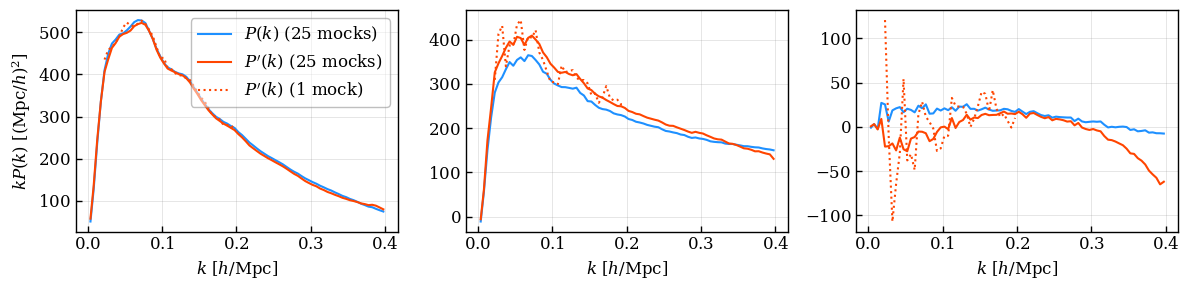

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=False, sharex=True)

for ill, ell in enumerate(cutsky_obs.ells):
    axes[ill].plot(k_cutsky, k_cutsky * mean_cutsky[ill], color='C0', linestyle='-', label=r'$P(k)$ (25 mocks)')
    axes[ill].plot(k_cutsky, k_cutsky * pknew_avg[ill], color='C1', linestyle='-', label=r'$P^{\prime}(k)$ (25 mocks)')
    axes[ill].plot(k_cutsky[masknew], k_cutsky[masknew] * pknew_mp[ill][masknew], color='C1', linestyle=':', label=r'$P^{\prime}(k)$ (1 mock)')
    axes[ill].set_xlabel(r'$k$ [$h$/Mpc]')
    #axes[ill].set_xlim((0, 0.2))
    
axes[0].set_ylabel(r'$k P(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
axes[0].legend()
plt.show()

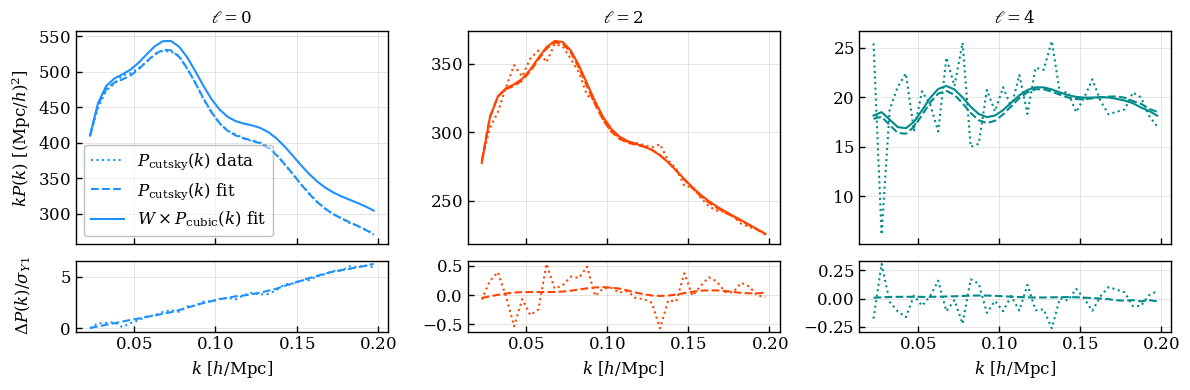

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4), sharey=False, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

for ill, ell in enumerate(cutsky_obs.ells):
    axes[0][ill].plot(k_cutsky[masknew], k_cutsky[masknew] * mean_cutsky[ill][masknew], color='C{:d}'.format(ill), linestyle=':', label=r'$P_{\mathrm{cutsky}}(k)$ data')
    axes[0][ill].plot(cutsky_obs.k[ill], cutsky_obs.k[ill] * cutsky_obs.theory[ill], color='C{:d}'.format(ill), linestyle='--', label=r'$P_{\mathrm{cutsky}}(k)$ fit')
    axes[0][ill].plot(wm.xout[ill], wm.xout[ill] * wm_pk[ill], color='C{:d}'.format(ill), ls='-', label=r'$W \times P_{\mathrm{cubic}}(k)$ fit')
    #axes[0][ill].plot(wm.xout[ill], wm.xout[ill] * wm_pk_cubicdata[ill], color='C{:d}'.format(ill), ls='-', label=r'$W \times P_{\mathrm{cubic}}(k)$ data', alpha=0.4)
    #axes[0][ill].plot(wm.xin[ill], wm.xin[ill] * pk_theory[ill], color='C{:d}'.format(ill), ls='-', label=r'$P_{\mathrm{cubic}}(k)$ fit', alpha=0.4)
    #axes[0][ill].set_xlim((0, 0.35))
    axes[0][ill].set_title(r'$\ell={}$'.format(ell))
    
    axes[1][ill].plot(wm.xout[ill], (wm_pk[ill] - mean_cutsky[ill][masknew])/stdY1[ill], color='C{:d}'.format(ill), linestyle=':')
    axes[1][ill].plot(wm.xout[ill], (wm_pk[ill] - cutsky_obs.theory[ill])/stdY1[ill], color='C{:d}'.format(ill), linestyle='--')
    axes[1][ill].set_xlabel(r'$k$ [$h$/Mpc]')
    
axes[0][0].set_ylabel(r'$k P(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
axes[1][0].set_ylabel(r'$\Delta P(k) / \sigma_{Y1} $')
axes[0][0].legend()
fig.align_ylabels()
plt.savefig(os.path.join(plots_dir, 'secondgenmocks_0.8_1.6_window_times_cubic_model{}.png'.format('_rpcut{}'.format(rp_cut) if rp_cut else '')), dpi=300)
plt.show()

In [45]:
mo.shape

(3, 240)

In [46]:
#l = mo.shape[1]//mo.shape[0]
#mos = np.array([mo[i][l*i:l*(i+1)] for i in range(len(ells))])

In [47]:
#covnew_trunc = truncate_cov(covnew, kinit=np.arange(0., 0.4, 0.005), kfinal=np.arange(0.02, 0.2, 0.005))
#stdY1new = np.sqrt(np.diag(covnew_trunc)).reshape((3, covnew_trunc.shape[0]//3))
stdY1new = np.sqrt(np.diag(covnew)).reshape((3, covnew.shape[0]//3))

In [48]:
len(stdY1new)

3

In [49]:
wmnew_pk.shape

(3, 36)

In [50]:
def chi2(m):
    nells = wmnew_pk.shape[0]
    r = wmnew_pk - pknew_avg[:, masknew] + (m.dot(mo[:, np.concatenate((masknew, )*nells)])).reshape(wmnew_pk.shape)
    chisq = np.sum(r**2 / stdY1new[:, masknew]**2)
    return chisq

from scipy.optimize import minimize

minimizer = minimize(chi2, x0=np.array([1, 1, 1]))
print(minimizer)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.065213568959782
        x: [-4.100e+02  1.809e+01 -3.827e+00]
      nit: 19
      jac: [-3.040e-06  6.557e-07 -1.788e-07]
 hess_inv: [[ 3.804e+01  1.925e-01 -1.746e+00]
            [ 1.925e-01  1.605e+01  1.421e-01]
            [-1.746e+00  1.421e-01  2.810e+02]]
     nfev: 96
     njev: 24


In [51]:
m = minimizer.x

In [52]:
nells = len(cutsky_obs.ells)
mmo = (m.dot(mo[:, np.concatenate((masknew, )*nells)])).reshape(wmnew_pk.shape)

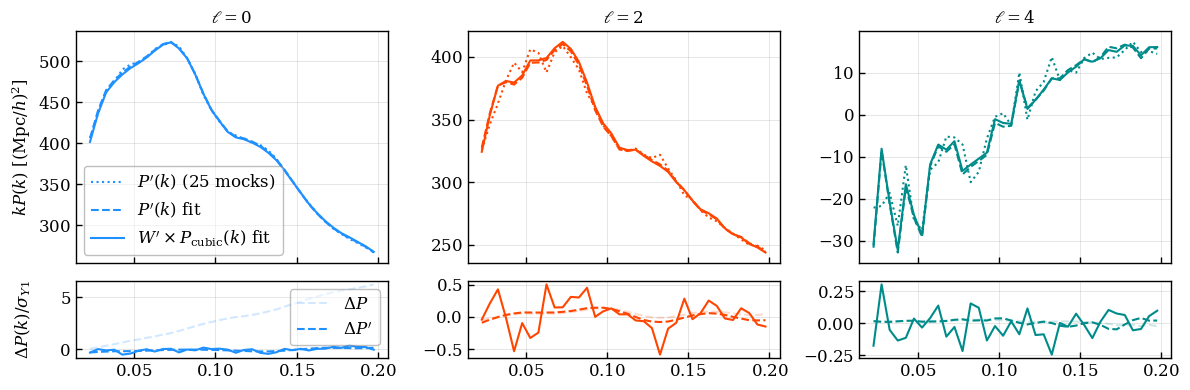

In [54]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4), sharey=False, sharex=True, gridspec_kw={'height_ratios': [3, 1]})

for ill, ell in enumerate(cutsky_obs.ells):
    #axes[0][ill].plot(k_cutsky[masknew], k_cutsky[masknew] * pknew_mp[ill][masknew], color='C{:d}'.format(ill), linestyle=':', label=r'$P_{\mathrm{cutsky}}(k)$ data')
    axes[0][ill].plot(k_cutsky[masknew], k_cutsky[masknew] * pknew_avg[ill][masknew], color='C{:d}'.format(ill), linestyle=':', label=r'$P^{\prime}(k)$ (25 mocks)')
    axes[0][ill].plot(cutsky_obs_sculptwindow.k[ill], cutsky_obs_sculptwindow.k[ill] * cutsky_obs_sculptwindow.theory[ill], color='C{:d}'.format(ill), linestyle='--', label=r'$P^{\prime}(k)$ fit')
    axes[0][ill].plot(wmnew.xout[ill], wmnew.xout[ill] * (wmnew_pk[ill] + mmo[ill]), color='C{:d}'.format(ill), ls='-', label=r'$W^{\prime} \times P_{\mathrm{cubic}}(k)$ fit')
    #axes[0][ill].plot(wm.xin[ill], wm.xin[ill] * pk_theory[ill], color='C{:d}'.format(ill), ls='-', label=r'$P_{\mathrm{cubic}}(k)$ fit', alpha=0.4)
    #axes[0][ill].set_xlim((0, 0.35))
    axes[0][ill].set_title(r'$\ell={}$'.format(ell))
    
    #axes[1][ill].plot(wm.xout[ill], (wm_pk[ill] - mean_cutsky[ill][masknew])/stdY1[ill], color='C{:d}'.format(ill), linestyle='-', label=r'$\Delta P$', alpha=0.2)
    axes[1][ill].plot(wmnew.xout[ill], (wmnew_pk[ill] - pknew_avg[ill][masknew] + mmo[ill])/stdY1new[ill][masknew], color='C{:d}'.format(ill), linestyle='-')
    axes[1][ill].plot(wm.xout[ill], (wm_pk[ill] - cutsky_obs.theory[ill])/stdY1[ill], color='C{:d}'.format(ill), linestyle='--', alpha=0.2, label=r'$\Delta P$')
    axes[1][ill].plot(wmnew.xout[ill], (wmnew_pk[ill] + mmo[ill] - cutsky_obs_sculptwindow.theory[ill])/stdY1new[ill][masknew], color='C{:d}'.format(ill), linestyle='--', label=r'$\Delta P^{\prime}$')
    #axes[1][ill].set_xlabel(r'$k$ [$h$/Mpc]')
    
axes[0][0].set_ylabel(r'$k P(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
axes[1][0].set_ylabel(r'$\Delta P(k) / \sigma_{Y1} $')
axes[0][0].legend()
axes[1][0].legend()
fig.align_ylabels()
plt.savefig(os.path.join(plots_dir, 'secondgenmocks_0.8_1.6_transformed_window_times_cubic_model{}_autokwid_capsig5_difflfac10.png'.format('_rpcut{}'.format(rp_cut) if rp_cut else '')), dpi=300)
plt.show()